# Predicting heart failure in patients 

## Importations

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Data display and overview

In [4]:
# Importing the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Preview of the dataset
df.head()

# Checking the ranges for every column
print(df.describe())

# Checking if there is any null values in the dataset
print(df.isna().sum()) # No null values

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<Axes: xlabel='DEATH_EVENT', ylabel='Count'>

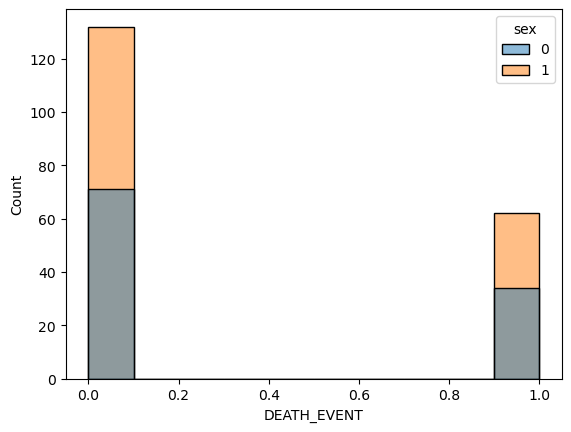

In [15]:
import seaborn as sns
sns.histplot(data = df, x = 'DEATH_EVENT', hue = 'sex')

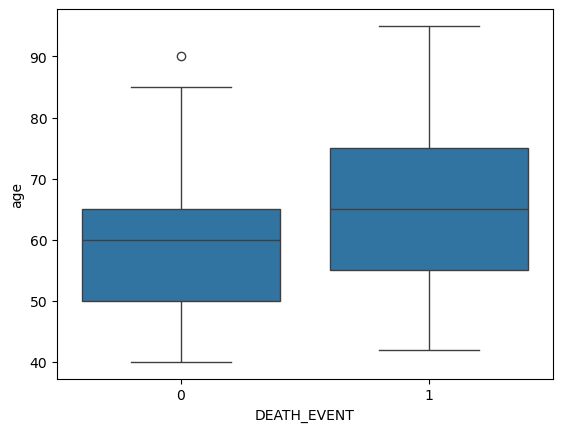

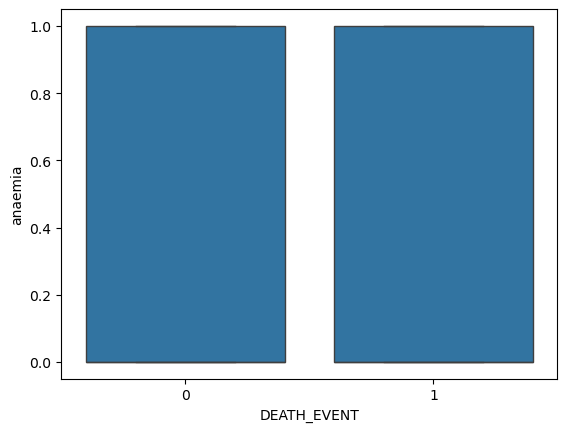

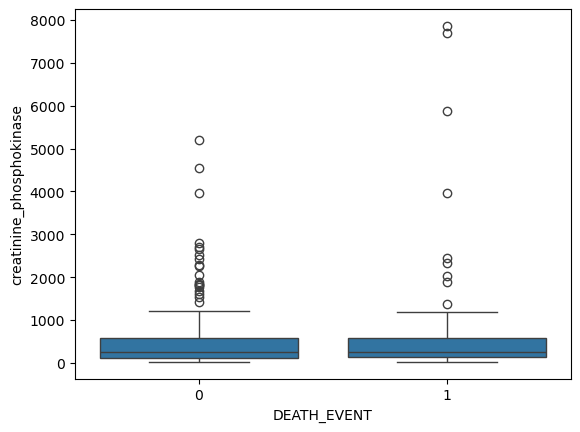

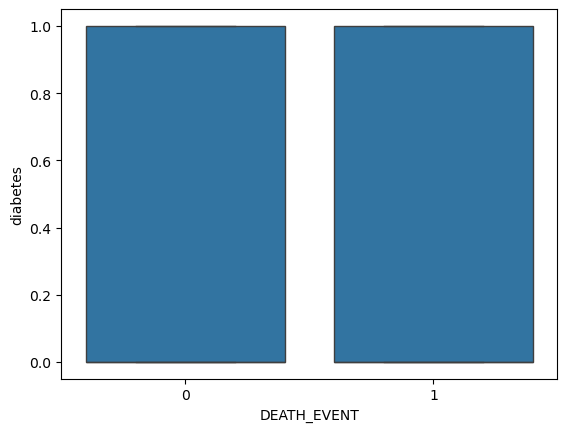

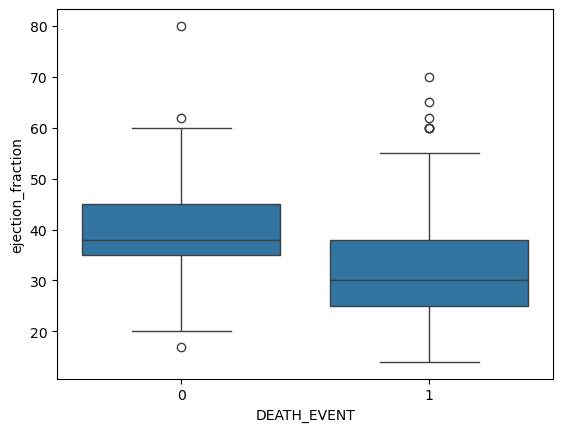

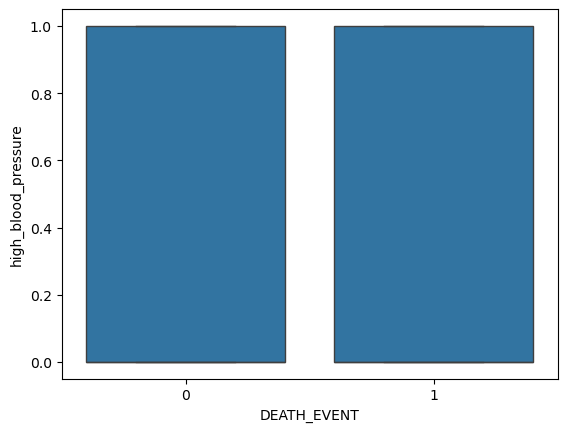

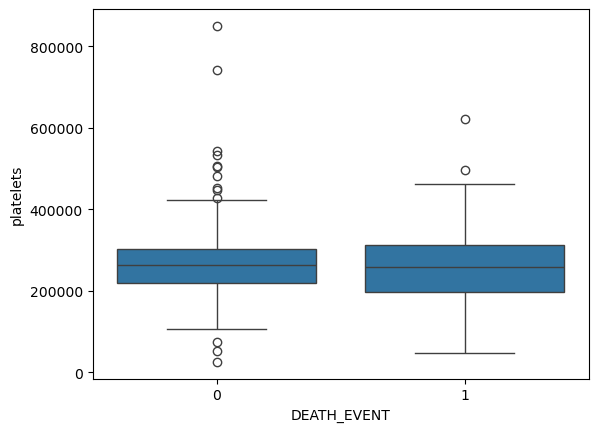

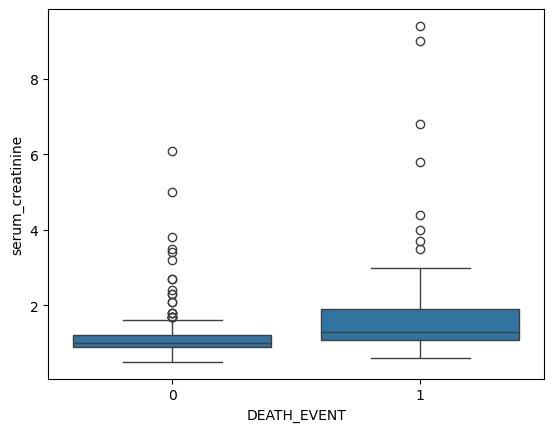

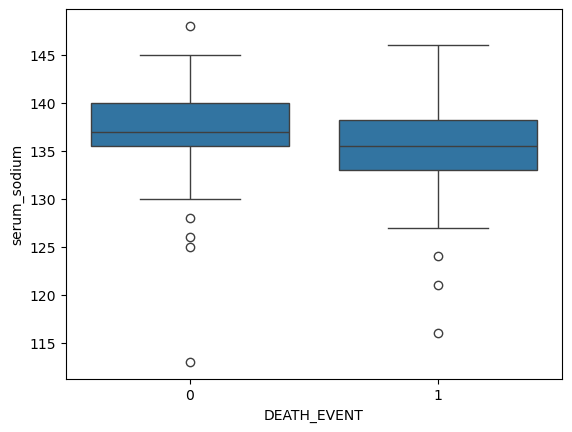

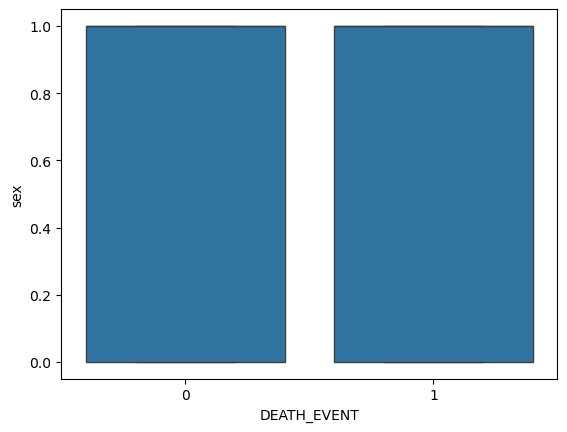

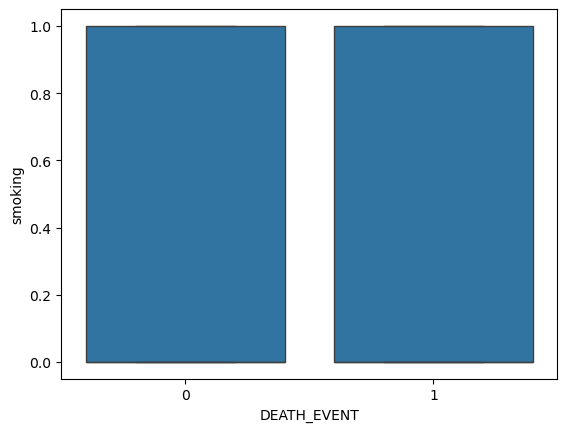

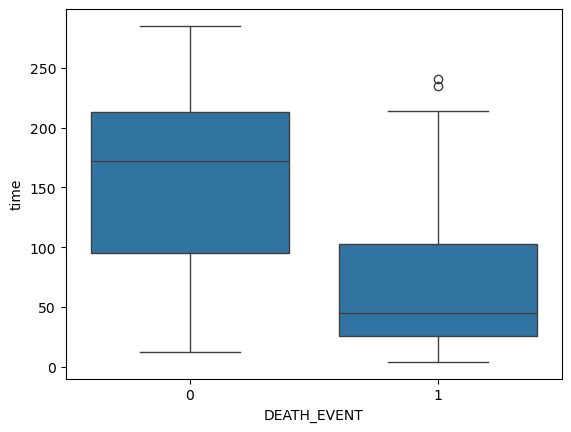

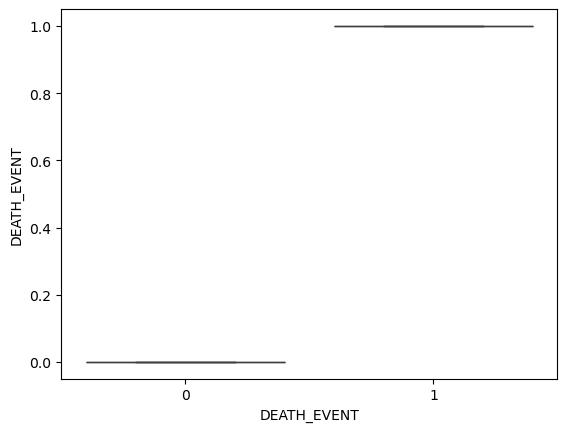

In [21]:
df.columns
for col in df.columns:
    sns.boxplot(data = df, y = col, x = 'DEATH_EVENT')
    plt.show()
# seems like we have a lot of outliers

In [32]:
# Renaming the last column for convinience
df.rename(columns = {'DEATH_EVENT' : 'death_event'}, inplace = True)

In [34]:
# Selection of the columns to pass as boolean
col_tobool = ['diabetes', 'anemia', 'high_blood_pressure', 'sex','smoking','DEATH_EVENT']

In [ ]:
# df_dummies = pd.get_dummies(df, columns = ['diabetes'], drop_first = True)

In [ ]:
# df_dummies.diabetes_1.dtype

In [50]:
knn = KNN()
scaler = RobustScaler()
scaler
knn

KNeighborsClassifier()

In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [52]:
# Spliting the data
X = df.drop(columns = 'death_event')
#Normalizinig the values of X
X_scaled = scaler.fit_transform(X)
y = df.death_event
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)


## Knn

In [54]:
# Training the model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"The accuracy for KNN is: {accuracy}") # essayer pcr pour ameliorer le model?

The accuracy for KNN is: 0.8111111111111111


## Decision tree classifier

In [199]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state = 1)
clf

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       random_state=1)

In [201]:
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'The accuracy score for the tree classifier is: {accuracy_tree}') # Model un peu meilleur que le knn

The accuracy score for the tree classifier is: 0.8666666666666667


In [203]:
# feature_names = df.columns.to_list()
# feature_names.remove('death_event')
# class_names = ['dead', 'noDead']
# print(feature_names)

# from sklearn import tree
# import graphviz

# dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names, class_names = class_names, filled = True)
# graph.render("decision_tree_graphviz", format="png")

# does not work because can't find executables for graphviz on my computer

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


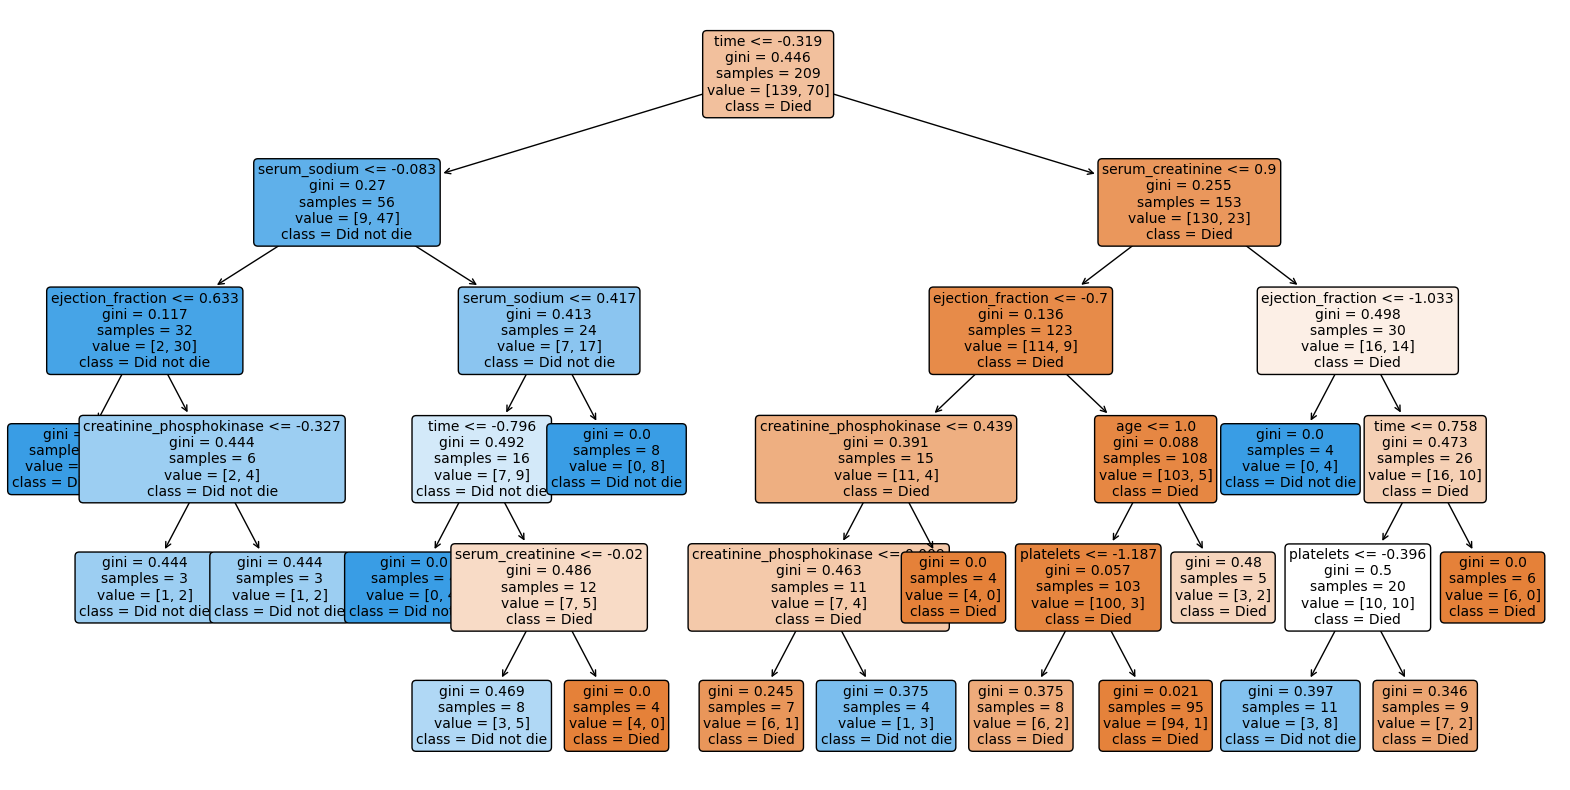

In [233]:
feature_names = df.columns.to_list()
feature_names.remove('death_event')
class_names = ['Died', 'Did not die']
print(feature_names)
fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(clf, 
               feature_names=feature_names,  # List of feature names
               class_names=class_names,      # List of class names
               filled=True, 
               rounded=True, fontsize = 10,
               ax=ax)
plt.show()

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(accuracy_log)

0.8333333333333334


## Model IA

In [24]:
df_ia = df.sample(frac = 1, random_state = 42)
x = df_ia.drop(columns = 'death_event')
y = df_ia['death_event']

In [26]:
# Splitting the data
train_length = int(np.round(len(x)*0.80))
validation_length= train_length + int(np.round(len(x)*0.10))
print(train_length)
print(validation_length)

239
269


In [28]:
# creating splits for our data
x_train=x.iloc[0:train_length] 
x_validation = x.iloc[train_length:validation_length]
x_test=x.iloc[validation_length:]
x_predict=x.iloc[validation_length:] 

y_train=y.iloc[0:train_length]
y_validation = y.iloc[train_length:validation_length] 
y_test=y.iloc[validation_length:]
y_predict=y.iloc[validation_length:]
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)
print(x_predict.shape)

(239, 12)
(30, 12)
(30, 12)
(30, 12)


In [32]:
# Standardizing the data
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)
x_predict = scaler.fit_transform(x_predict)

In [34]:
# importing libraries for AI generation
import tensorflow as tf
from tensorflow import keras
import sklearn

In [35]:
model= keras.models.Sequential()
model.add(keras.layers.Dense(600, activation="relu", input_shape=x_train.shape[1:]))#ajout d'une couche caché de 300 neurones et utilisant la fonction d'activation ReLu
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300,activation="relu"));
model.add(keras.layers.Dense(300,activation="relu"));
model.add(keras.layers.Dense(1)); #death event or not
model.summary()

C:\Users\wasza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 600)            │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,901 (2.44 MB)

 Trainable params: 639,901 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss="mean_squared_error", optimizer = 'adam', metrics=["accuracy"])
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_validation,y_validation))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6856 - loss: 0.2341 - val_accuracy: 0.6333 - val_loss: 0.2265
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7382 - loss: 0.1626 - val_accuracy: 0.6333 - val_loss: 0.2172
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8719 - loss: 0.1136 - val_accuracy: 0.7333 - val_loss: 0.1874
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8740 - loss: 0.0858 - val_accuracy: 0.7000 - val_loss: 0.1696
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8910 - loss: 0.0756 - val_accuracy: 0.6667 - val_loss: 0.1990
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9473 - loss: 0.0478 - val_accuracy: 0.6667 - val_loss: 0.2334
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9288 - loss: 0.0503 - val_accuracy: 0.6000 - val_loss: 0.2284
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9507 - loss: 0.0434 - val_accuracy: 0.6000 - val_loss:

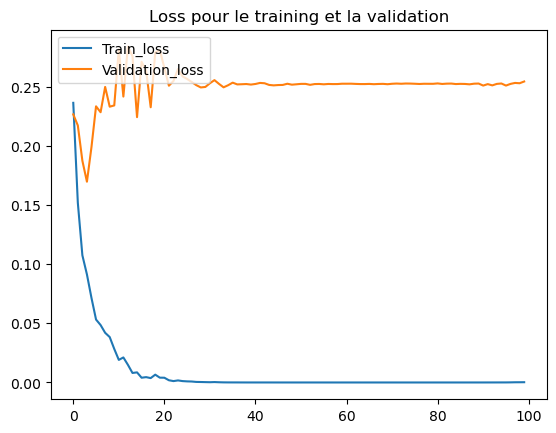

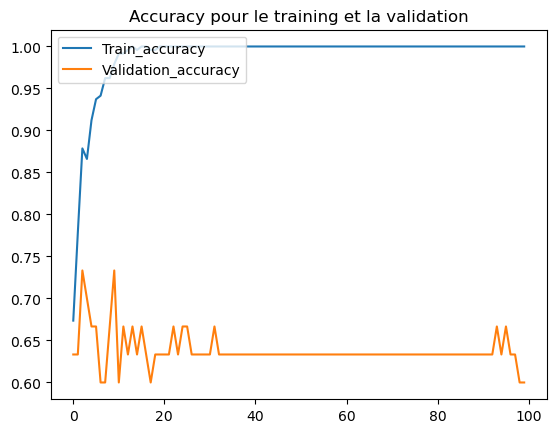

In [40]:
loss_curve=history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train_loss")
plt.plot(loss_val_curve, label = "Validation_loss")
plt.legend(loc='upper left')
plt.title("Loss pour le training et la validation")
plt.show()

plt.plot(acc_curve, label="Train_accuracy")
plt.plot(acc_val_curve, label="Validation_accuracy")
plt.legend(loc='upper left')
plt.title("Accuracy pour le training et la validation")
plt.show()

In [44]:
# additionnal hints
import warnings
warnings.filterwarnings('ignore')

cross validation K-fold